In [1]:
import os.path

import xarray as xr

from xcube_smos.dgg import SmosDiscreteGlobalGrid
from xcube_smos.l2prod import SmosMappedL2Product

The SMOS discrete global grid. Installed by SNAP SMOS-Box in "~/.snap/auxdata":

In [2]:
dgg_path = os.path.expanduser("~/.snap/auxdata/smos-dgg/grid-tiles")

Path for a sample SMOS Level-2 product

In [3]:
l2_product_path = "../testdata/SM_OPER_MIR_SMUDP2_20220405T182911_20220405T192224_700_001_1.nc"

---

In [4]:
dgg = SmosDiscreteGlobalGrid(dgg_path)

In [5]:
dgg_ds_0 = dgg.get_dataset(0)

In [6]:
dgg_ds_0

<xarray.Dataset>
Dimensions:  (lat: 8064, lon: 16384)
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Data variables:
    seqnum   (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>

In [7]:
dgg_ds_0.seqnum

<xarray.DataArray 'seqnum' (lat: 8064, lon: 16384)>
dask.array<open_dataset-d81f1f09ade1e4f1940d667cd0797578seqnum, shape=(8064, 16384), dtype=uint32, chunksize=(504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0

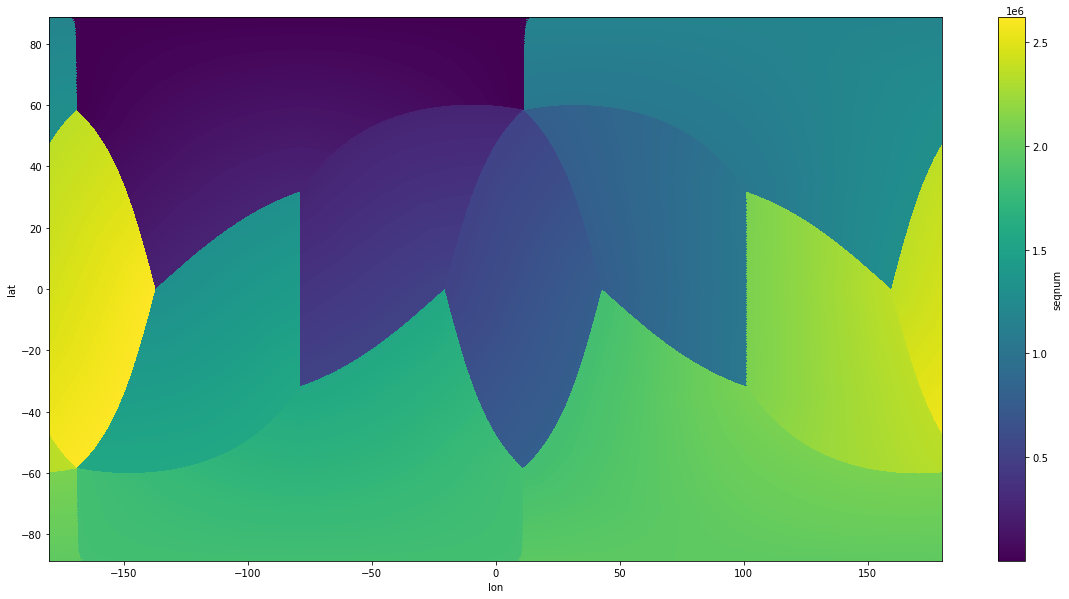

In [8]:
dgg_ds_0.seqnum.plot.imshow(figsize=(20, 10))

---

In [9]:
mapped_l2 = SmosMappedL2Product.open(l2_product_path, dgg)

In [10]:
l2_product = mapped_l2.l2_product
l2_product

<xarray.Dataset>
Dimensions:                      (n_grid_points: 80841)
Dimensions without coordinates: n_grid_points
Data variables: (12/72)
    Surface_Temperature_DQX      (n_grid_points) float32 ...
    Scattering_Albedo_H          (n_grid_points) float32 ...
    Dielect_Const_MD_IM_DQX      (n_grid_points) float32 ...
    Tau_Cur_DQX                  (n_grid_points) float32 ...
    M_AVA0                       (n_grid_points) uint16 ...
    DIFF_Albedos_DQX             (n_grid_points) float32 ...
    ...                           ...
    TB_TOA_Theta_B_V             (n_grid_points) float32 ...
    Seconds                      (n_grid_points) uint32 ...
    N_Point_Source_RFI           (n_grid_points) uint16 ...
    N_X_Band                     (n_grid_points) uint16 ...
    Altitude                     (n_grid_points) float32 ...
    Dielect_Const_MD_RE          (n_grid_points) float32 ...
Attributes: (12/397)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                         ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

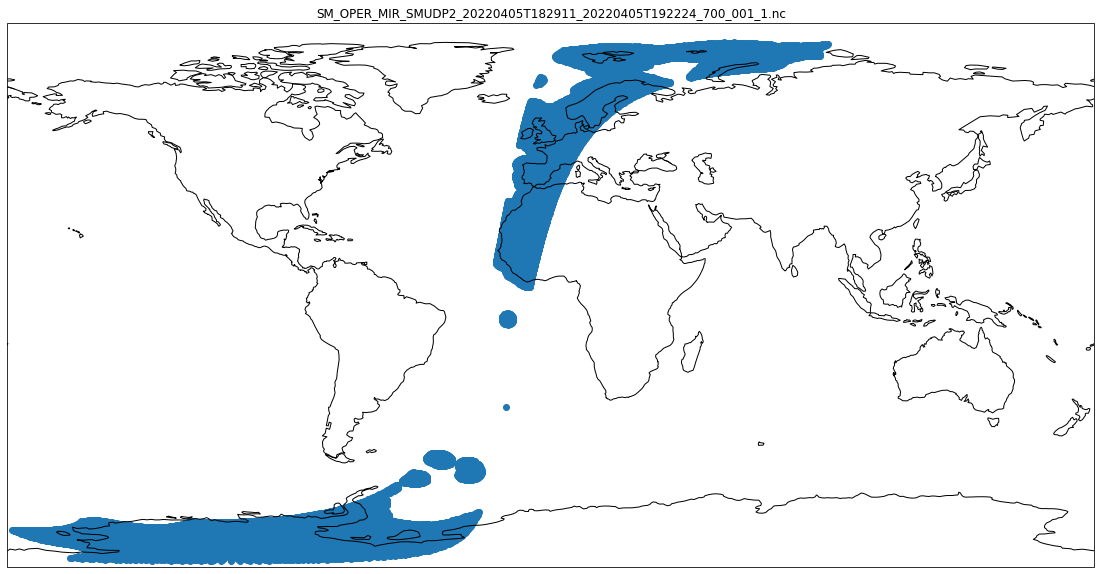

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title(os.path.basename(l2_product_path))
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())
ax.figure.set_size_inches(20, 10)
ax.coastlines(resolution='110m')
plt.scatter(l2_product.Longitude, l2_product.Latitude)
plt.show()

In [12]:
mapped_l2.l2_index

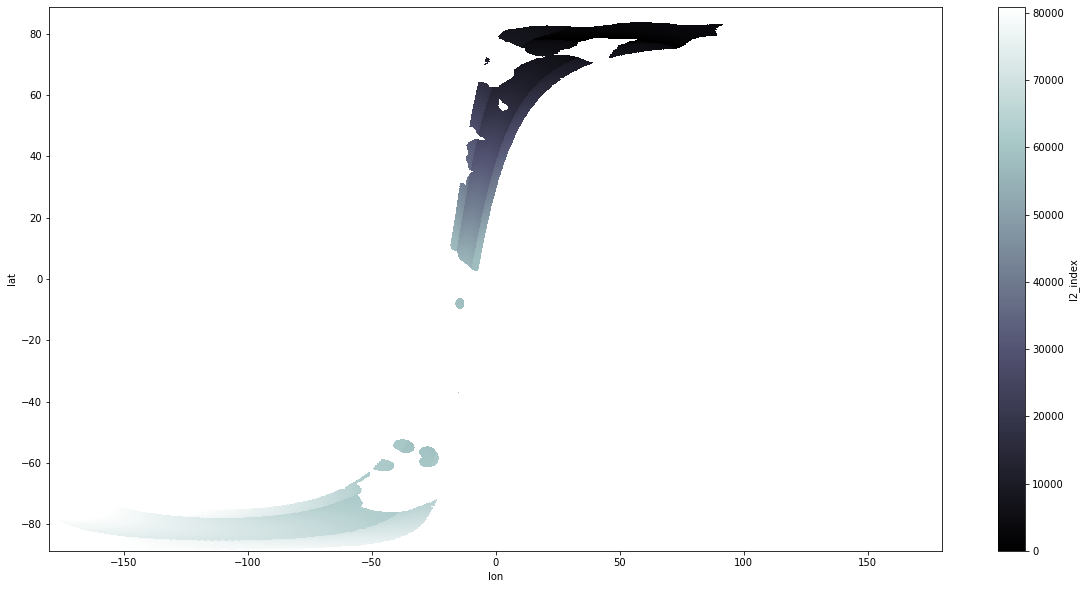

In [13]:
mapped_l2.l2_index.get_dataset(0).l2_index.plot.imshow(figsize=(20, 10), cmap="bone")

In [14]:
l2_ds_0 = mapped_l2.get_dataset(0)
l2_ds_0

<xarray.Dataset>
Dimensions:                      (lat: 8064, lon: 16384)
Coordinates:
  * lat                          (lat) float64 88.58 88.56 ... -88.56 -88.58
  * lon                          (lon) float64 -180.0 -180.0 ... 180.0 180.0
Data variables: (12/72)
    Surface_Temperature_DQX      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Scattering_Albedo_H          (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Dielect_Const_MD_IM_DQX      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Tau_Cur_DQX                  (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    M_AVA0                       (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    DIFF_Albedos_DQX             (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    ...                           ...
    TB_TOA_Theta_B_V             (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Seconds                      (lat, lon) uint32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    N_Point_Source_RFI           (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    N_X_Band                     (lat, lon) uint16 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Altitude                     (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Dielect_Const_MD_RE          (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
Attributes: (12/397)
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...
    FH:File_Name:                                                            ...
    FH:File_Description:                                                     ...
    FH:Mission:                                                              ...
    FH:File_Class:                                                           ...
    ...                                                                                                                         ...
    VH:MPH:OI:Y_Position:                                                    ...
    VH:MPH:OI:Z_Position:                                                    ...
    VH:MPH:OI:X_Velocity:                                                    ...
    VH:MPH:OI:Y_Velocity:                                                    ...
    VH:MPH:OI:Z_Velocity:                                                    ...
    VH:MPH:OI:Vector_Source:                                                 ...

In [15]:
l2_ds_0.Soil_Moisture

<xarray.DataArray 'Soil_Moisture' (lat: 8064, lon: 16384)>
dask.array<map_l2_values, shape=(8064, 16384), dtype=float32, chunksize=(504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
Attributes:
    units:       m3 m-3
    _FillValue:  -999.0

Because the underlying Level-2 product has been opened using `decode_cf=False`, the value -999 _is not_ turned into NaN:

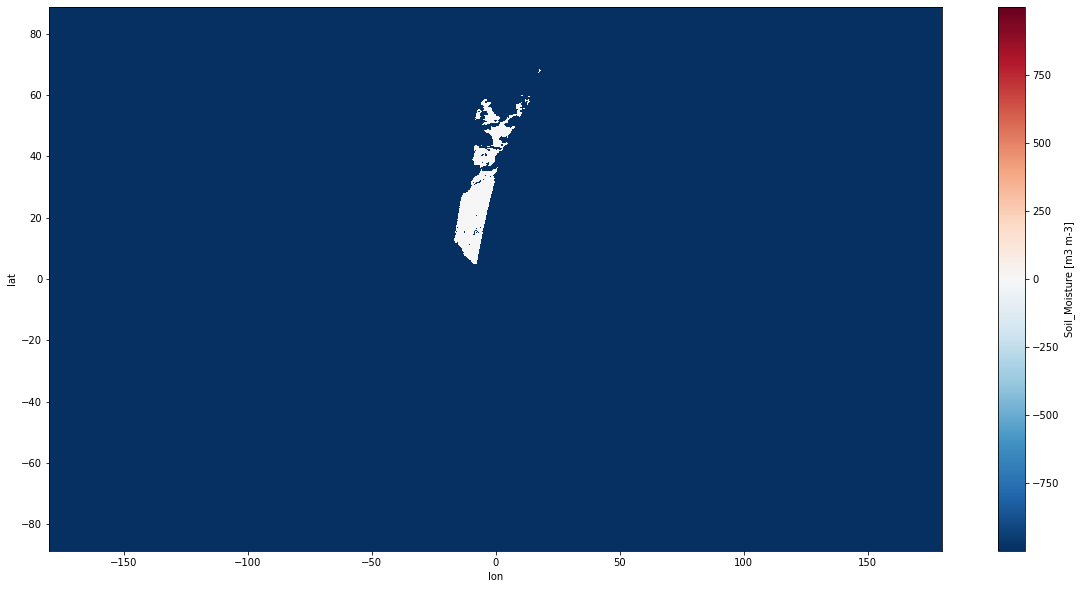

In [16]:
l2_ds_0.Soil_Moisture.plot.imshow(figsize=(20, 10))

Skip negative value by `vmin=0`:

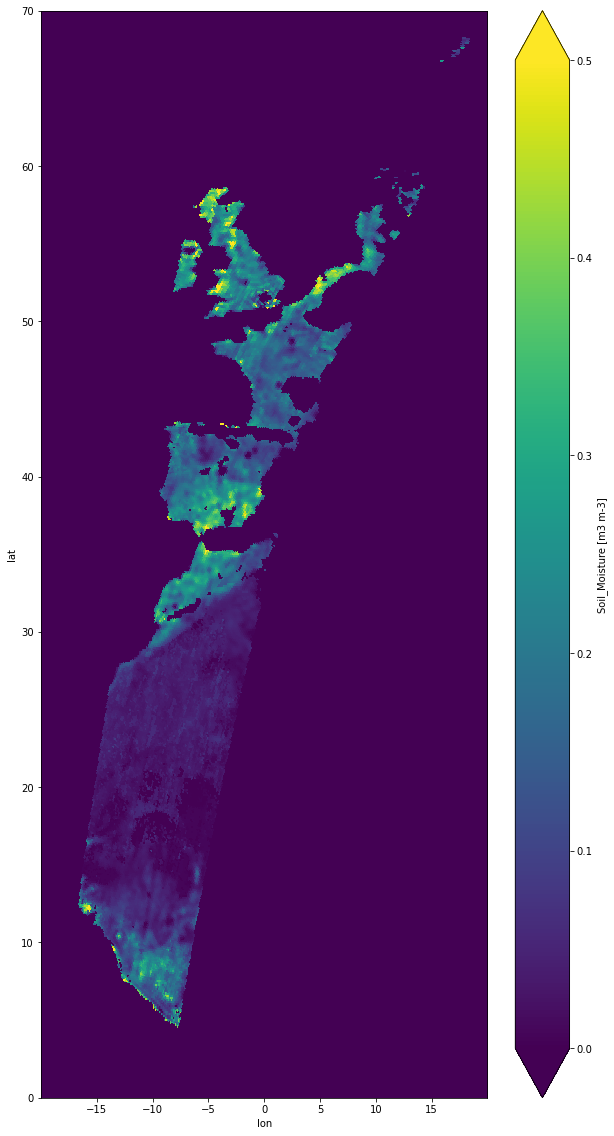

In [17]:
l2_ds_0.Soil_Moisture.sel(lon=slice(-20., 20.), lat=slice(70., 0.)).plot.imshow(figsize=(10, 20), vmin=0, vmax=0.5)

---

Try writing as Zarr and skipping empty chunks:

In [26]:
import shutil
import json
import zarr
import dask.array as da
import numcodecs
import numpy as np

In [27]:
mapped_l2_zarr_path = os.path.splitext(l2_product_path)[0] + ".zarr"

In [28]:
shutil.rmtree(mapped_l2_zarr_path, ignore_errors=True)

In [29]:
encodings = {
    var_name: {**var.encoding, "write_empty_chunks": False}
    for var_name, var in l2_ds_0.data_vars.items()
}

# The above doesn't work: 
# ValueError: unexpected encoding parameters for zarr backend:  ['write_empty_chunks']: 
encodings = None

#l2_ds_0.to_zarr(mapped_l2_zarr_path, mode="w", encoding=encodings)

Try writing "raw" Zarr

In [21]:
os.mkdir(mapped_l2_zarr_path)

with open(f"{mapped_l2_zarr_path}/.zgroup", "w") as f:
    json.dump({"zarr_format": 2}, f)
with open(f"{mapped_l2_zarr_path}/.zattrs", "w") as f:
    json.dump({}, f)

for var_name, var in l2_ds_0.data_vars.items():
    display(f"Writing {var_name}")
    da.to_zarr(
        var.data, 
        f"{mapped_l2_zarr_path}/{var_name}",
        write_empty_chunks=False,
        fill_value=var.attrs.get("_FillValue"),
        compressor=numcodecs.Blosc(),
    )

'Writing Surface_Temperature_DQX'

'Writing Scattering_Albedo_H'

'Writing Dielect_Const_MD_IM_DQX'

'Writing Tau_Cur_DQX'

'Writing M_AVA0'

'Writing DIFF_Albedos_DQX'

'Writing Latitude'

'Writing Roughness_Param_DQX'

'Writing TB_ASL_Theta_B_H_DQX'

'Writing DIFF_Albedos'

'Writing Dielect_Const_Non_MD_RE_DQX'

'Writing N_RFI_Y'

'Writing N_RFI_X'

'Writing RTT_DQX'

'Writing N_Sun_Tails'

'Writing DGG_Current_Flags'

'Writing Optical_Thickness_Nad_DQX'

'Writing N_Sun_Glint_Area'

'Writing Longitude'

'Writing GQX'

'Writing TB_TOA_Theta_B_H_DQX'

'Writing N_Calibration_Error'

'Writing Dielect_Const_Non_MD_RE'

'Writing Science_Flags'

'Writing N_RFI_Mitigations'

'Writing N_Wild'

'Writing TTH'

'Writing N_ADF_Error'

'Writing AFP'

'Writing N_Software_Error'

'Writing Dielect_Const_MD_IM'

'Writing Soil_Moisture_DQX'

'Writing Dielect_Const_Non_MD_IM'

'Writing RTT'

'Writing M_AVA'

'Writing Roughness_Param'

'Writing Processing_Flags'

'Writing Chi_2'

'Writing Days'

'Writing RFI_Prob'

'Writing Scattering_Albedo_H_DQX'

'Writing N_AF_FOV'

'Writing N_Sun_FOV'

'Writing TB_ASL_Theta_B_V'

'Writing Dielect_Const_Non_MD_IM_DQX'

'Writing TB_ASL_Theta_B_V_DQX'

'Writing S_Tree_1'

'Writing S_Tree_2'

'Writing X_Swath'

'Writing Chi_2_P'

'Writing Dielect_Const_MD_RE_DQX'

'Writing N_Sky'

'Writing N_Strong_RFI'

'Writing HR_Cur_DQX'

'Writing Confidence_Flags'

'Writing Surface_Temperature'

'Writing TB_ASL_Theta_B_H'

'Writing TB_TOA_Theta_B_V_DQX'

'Writing Microseconds'

'Writing N_Tails_Point_Source_RFI'

'Writing TTH_DQX'

'Writing Optical_Thickness_Nad'

'Writing Grid_Point_ID'

'Writing N_Instrument_Error'

'Writing Soil_Moisture'

'Writing TB_TOA_Theta_B_H'

'Writing TB_TOA_Theta_B_V'

'Writing Seconds'

'Writing N_Point_Source_RFI'

'Writing N_X_Band'

'Writing Altitude'

'Writing Dielect_Const_MD_RE'

In [23]:
for var_name, var in l2_ds_0.data_vars.items():
    display(f"Writing {var_name} attributes")
    with open(f"{mapped_l2_zarr_path}/{var_name}/.zattrs", "w") as f:
        attrs = {
            k: (list(v) if isinstance(v, np.ndarray) else 
                float(v) if isinstance(v, np.floating) else 
                int(v) if isinstance(v, np.integer) else 
                v) 
            for k, v in var.attrs.items()
        }
        #for k, v in var.attrs.items():
        #    display(f"{k}: v --> {type(v)}")
        #json.dump(dict(_ARRAY_DIMENSIONS=list(var.dims), **attrs), f)
        json.dump({"_ARRAY_DIMENSIONS": list(var.dims)}, f)

'Writing Surface_Temperature_DQX attributes'

'Writing Scattering_Albedo_H attributes'

'Writing Dielect_Const_MD_IM_DQX attributes'

'Writing Tau_Cur_DQX attributes'

'Writing M_AVA0 attributes'

'Writing DIFF_Albedos_DQX attributes'

'Writing Latitude attributes'

'Writing Roughness_Param_DQX attributes'

'Writing TB_ASL_Theta_B_H_DQX attributes'

'Writing DIFF_Albedos attributes'

'Writing Dielect_Const_Non_MD_RE_DQX attributes'

'Writing N_RFI_Y attributes'

'Writing N_RFI_X attributes'

'Writing RTT_DQX attributes'

'Writing N_Sun_Tails attributes'

'Writing DGG_Current_Flags attributes'

'Writing Optical_Thickness_Nad_DQX attributes'

'Writing N_Sun_Glint_Area attributes'

'Writing Longitude attributes'

'Writing GQX attributes'

'Writing TB_TOA_Theta_B_H_DQX attributes'

'Writing N_Calibration_Error attributes'

'Writing Dielect_Const_Non_MD_RE attributes'

'Writing Science_Flags attributes'

'Writing N_RFI_Mitigations attributes'

'Writing N_Wild attributes'

'Writing TTH attributes'

'Writing N_ADF_Error attributes'

'Writing AFP attributes'

'Writing N_Software_Error attributes'

'Writing Dielect_Const_MD_IM attributes'

'Writing Soil_Moisture_DQX attributes'

'Writing Dielect_Const_Non_MD_IM attributes'

'Writing RTT attributes'

'Writing M_AVA attributes'

'Writing Roughness_Param attributes'

'Writing Processing_Flags attributes'

'Writing Chi_2 attributes'

'Writing Days attributes'

'Writing RFI_Prob attributes'

'Writing Scattering_Albedo_H_DQX attributes'

'Writing N_AF_FOV attributes'

'Writing N_Sun_FOV attributes'

'Writing TB_ASL_Theta_B_V attributes'

'Writing Dielect_Const_Non_MD_IM_DQX attributes'

'Writing TB_ASL_Theta_B_V_DQX attributes'

'Writing S_Tree_1 attributes'

'Writing S_Tree_2 attributes'

'Writing X_Swath attributes'

'Writing Chi_2_P attributes'

'Writing Dielect_Const_MD_RE_DQX attributes'

'Writing N_Sky attributes'

'Writing N_Strong_RFI attributes'

'Writing HR_Cur_DQX attributes'

'Writing Confidence_Flags attributes'

'Writing Surface_Temperature attributes'

'Writing TB_ASL_Theta_B_H attributes'

'Writing TB_TOA_Theta_B_V_DQX attributes'

'Writing Microseconds attributes'

'Writing N_Tails_Point_Source_RFI attributes'

'Writing TTH_DQX attributes'

'Writing Optical_Thickness_Nad attributes'

'Writing Grid_Point_ID attributes'

'Writing N_Instrument_Error attributes'

'Writing Soil_Moisture attributes'

'Writing TB_TOA_Theta_B_H attributes'

'Writing TB_TOA_Theta_B_V attributes'

'Writing Seconds attributes'

'Writing N_Point_Source_RFI attributes'

'Writing N_X_Band attributes'

'Writing Altitude attributes'

'Writing Dielect_Const_MD_RE attributes'

In [24]:
l2_ds_0 = xr.open_zarr(mapped_l2_zarr_path)
l2_ds_0

C:\Users\norma\AppData\Local\Temp\ipykernel_2600\700628339.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  l2_ds_0 = xr.open_zarr(mapped_l2_zarr_path)


<xarray.Dataset>
Dimensions:                      (lat: 8064, lon: 16384)
Dimensions without coordinates: lat, lon
Data variables: (12/72)
    AFP                          (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Altitude                     (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Chi_2                        (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Chi_2_P                      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Confidence_Flags             (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    DGG_Current_Flags            (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    ...                           ...
    TB_TOA_Theta_B_V             (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    TB_TOA_Theta_B_V_DQX         (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    TTH                          (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    TTH_DQX                      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    Tau_Cur_DQX                  (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>
    X_Swath                      (lat, lon) float32 dask.array<chunksize=(504, 512), meta=np.ndarray>

In [25]:
l2_ds_0.Soil_Moisture.sel(lon=slice(-20., 20.), lat=slice(70., 0.)).plot.imshow(figsize=(10, 20), vmin=0, vmax=0.5)

TypeError: 'float' object cannot be interpreted as an integer